# ECE-GY 6143 HW11
## Guandong Kou (gk1675)

In [1]:
run styles.ipynb

## Problem 1

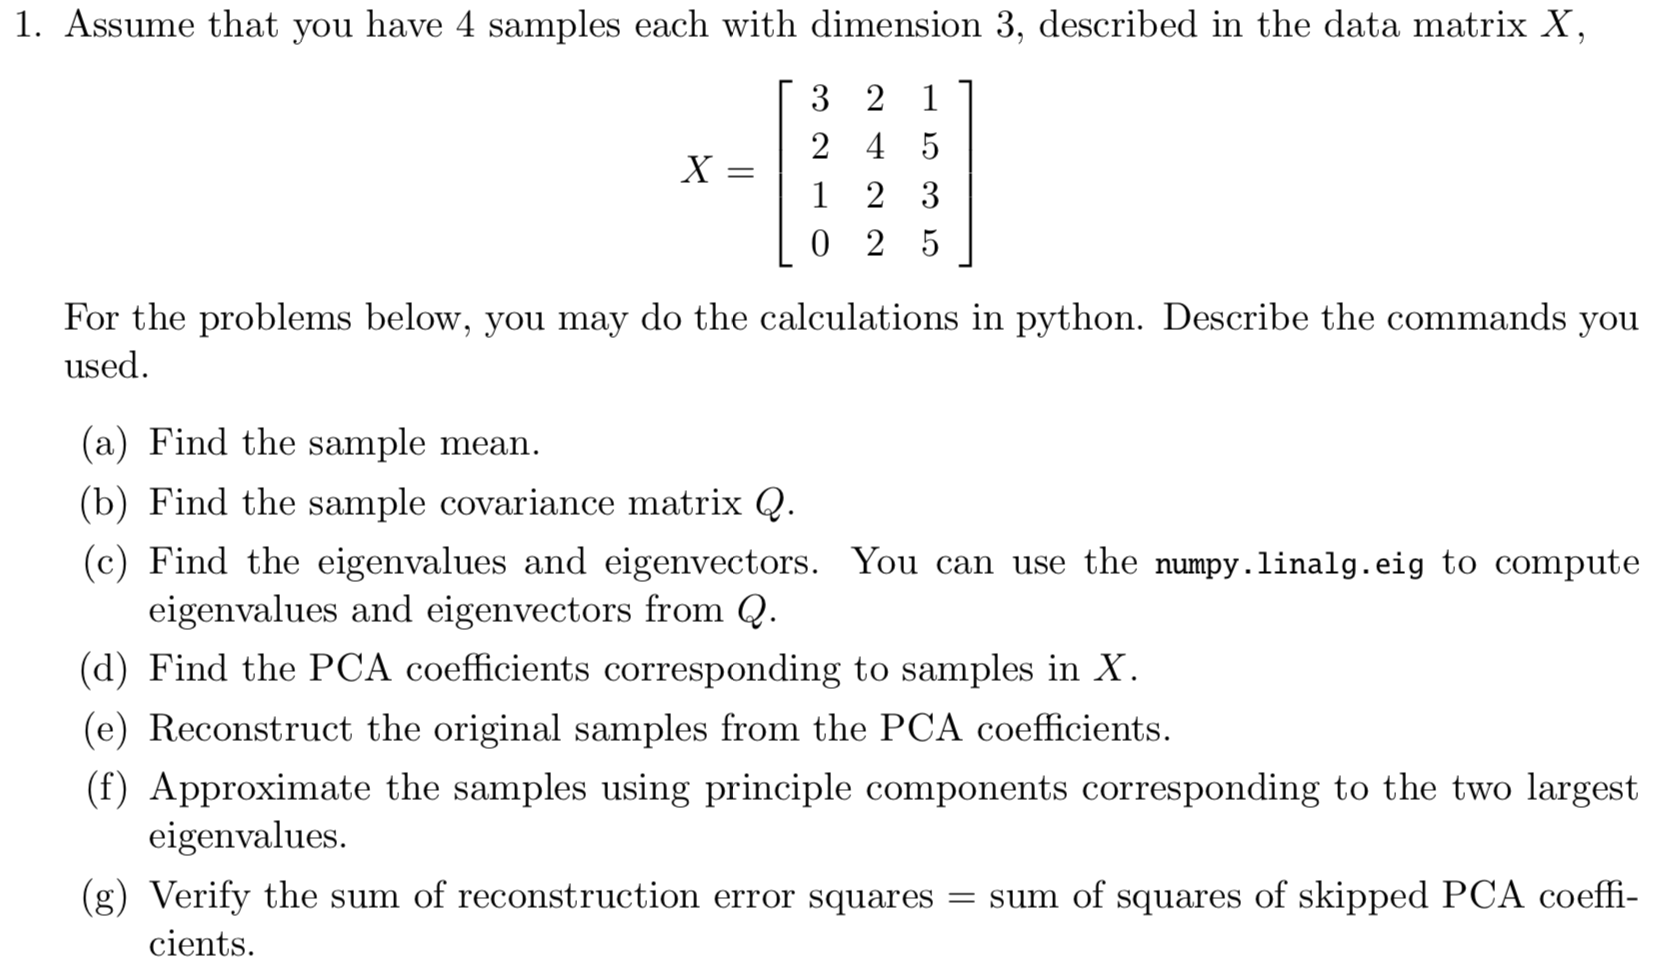

In [2]:
import numpy as np

### 1a)

In [3]:
X = np.array([
    [3,2,1],
    [2,4,5],
    [1,2,3],
    [0,2,5]
])

In [4]:
X_mean = np.mean(X, axis=0)
X_mean

array([1.5, 2.5, 3.5])

### 1b)

In [5]:
# mean_removed matrix for X
Xs = X - X_mean[None,:]
N = X.shape[0]
A = 1/np.sqrt(N)*Xs
Q = A.T.dot(A)

In [6]:
Q

array([[ 1.25,  0.25, -1.25],
       [ 0.25,  0.75,  0.75],
       [-1.25,  0.75,  2.75]])

### 1c)

In [7]:
w,v = np.linalg.eig(Q)
for i in range(len(w)):
    print('%-20s %-20s' %('eigenvalue', 'eigenvector'))
    print('%s, %s' %(w[i], v[:,i]))

eigenvalue           eigenvector         
3.561664642773028, [-0.45056922  0.19247228  0.87174641]
eigenvalue           eigenvector         
1.1733802957941613, [-0.66677184 -0.72187235 -0.18524476]
eigenvalue           eigenvector         
0.014955061432806133, [-0.59363515  0.66472154 -0.45358856]


### 1d)

In [8]:
Z = Xs.dot(v)
print('The PCA coefficients are \n{}.'.format(Z))

The PCA coefficients are 
[[-2.95145599 -0.17610969 -0.0888421 ]
 [ 1.37104342 -1.69406159  0.0198819 ]
 [-0.30682473  0.78694448  0.19125108]
 [ 1.8872373   1.0832268  -0.12229089]].


### 1e)

In [9]:
Xhat = Z.dot(v.T) + X_mean[None,:]
print('The reconstructed samples are \n{}.'.format(Xhat))

The reconstructed samples are 
[[3.0000000e+00 2.0000000e+00 1.0000000e+00]
 [2.0000000e+00 4.0000000e+00 5.0000000e+00]
 [1.0000000e+00 2.0000000e+00 3.0000000e+00]
 [8.8817842e-16 2.0000000e+00 5.0000000e+00]].


### 1f)

In [10]:
Z_approx = Xs.dot(v[:,:2])
Xhat_approx = Z_approx.dot(v[:,:2].T) + X_mean[None,:]
print('The approximate samples are \n{}.'.format(Xhat_approx)) 

The approximate samples are 
[[ 2.94726021  2.05905526  0.95970224]
 [ 2.0118026   3.98678407  5.0090182 ]
 [ 1.11353336  1.87287129  3.0867493 ]
 [-0.07259617  2.08128939  4.94453025]].


### 1g)

In [11]:
construction_error_square_sum = np.sum((Xhat-Xhat_approx)**2) 
skipped_pca_coef_square_sum = np.sum(Z[:,-1]**2)

print(construction_error_square_sum) 
print(skipped_pca_coef_square_sum) 

0.05982024573122603
0.05982024573122595


The difference is due to round-up error.

## Problem 2

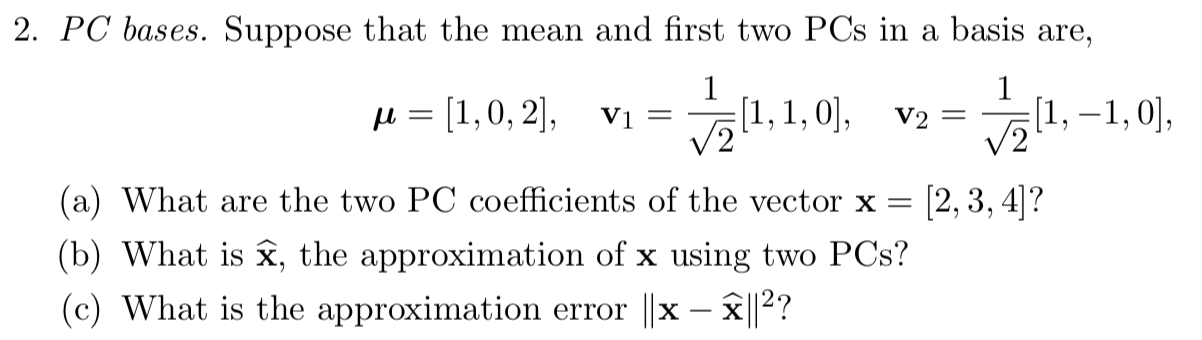

### 2a)

In [12]:
miu = np.array([1,0,2])
v1 = np.array([1,1,0]) / np.sqrt(2)
v2 = np.array([1,-1,0]) / np.sqrt(2)

In [13]:
x = np.array([2,3,4])
pc1 = v1.T.dot(x - miu)
pc2 = v2.T.dot(x - miu)

In [14]:
pc1, pc2

(2.82842712474619, -1.414213562373095)

### 2b)

In [20]:
x_hat = miu + pc1 * v1 + pc2 *v2

In [21]:
x_hat

array([2., 3., 2.])

### 2c)

In [24]:
np.linalg.norm(x - x_hat) ** 2

4.0

## Problem 3

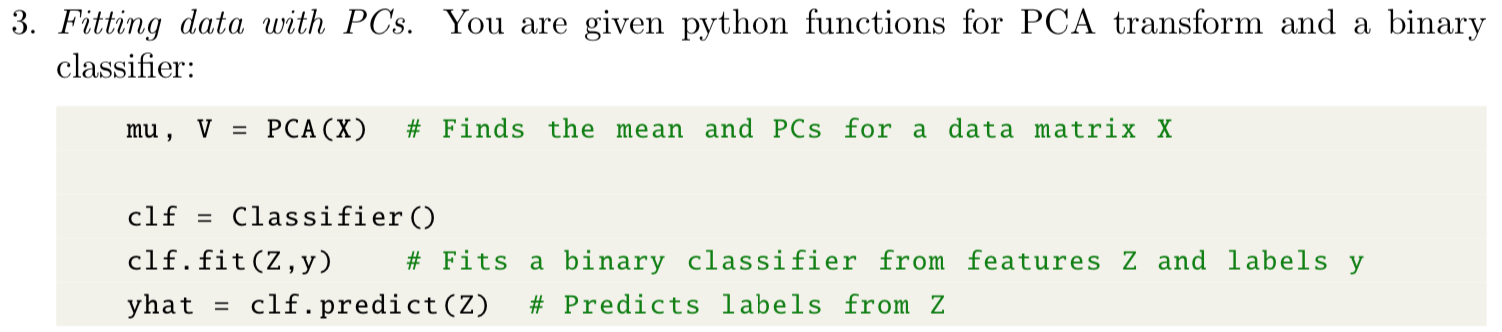

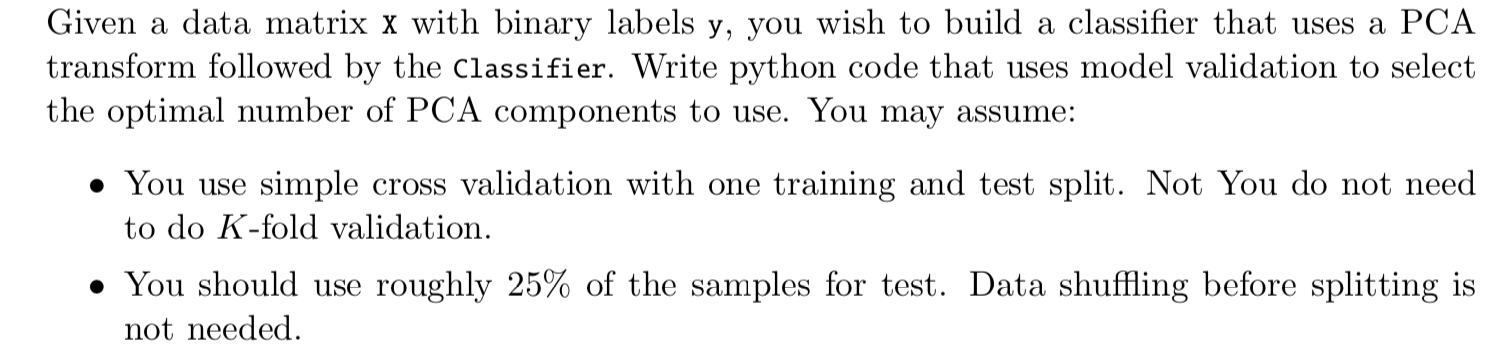

In [ ]:
def get_opmimal_PC(X):
    n_samples = X.shape[0]
    n_tr = int(n_samples * 0.25)
    Xtr, Xts, ytr, yts = X[:n_tr], X[ntr:], y[:n_tr], y[ntr:]
    max_pc = len(X[0])
    acc = np.zeros((max_pc, 1))
    for ncomp in range(1, max_pc+1):
        pca = PCA(n_components=ncomp, whiten=True)
        pca.fit(Xtr)
        Ztr = pca.transform(Xtr)
        clf = Classifier()
        clf.fit(Ztr, ytr)
        Zts = pca.transform(Xts)
        yhat = logreg.predict(Zts)
        acc[i] = np.mean(yhat == yts)
    return np.argmax(acc) + 1

## Problem 4

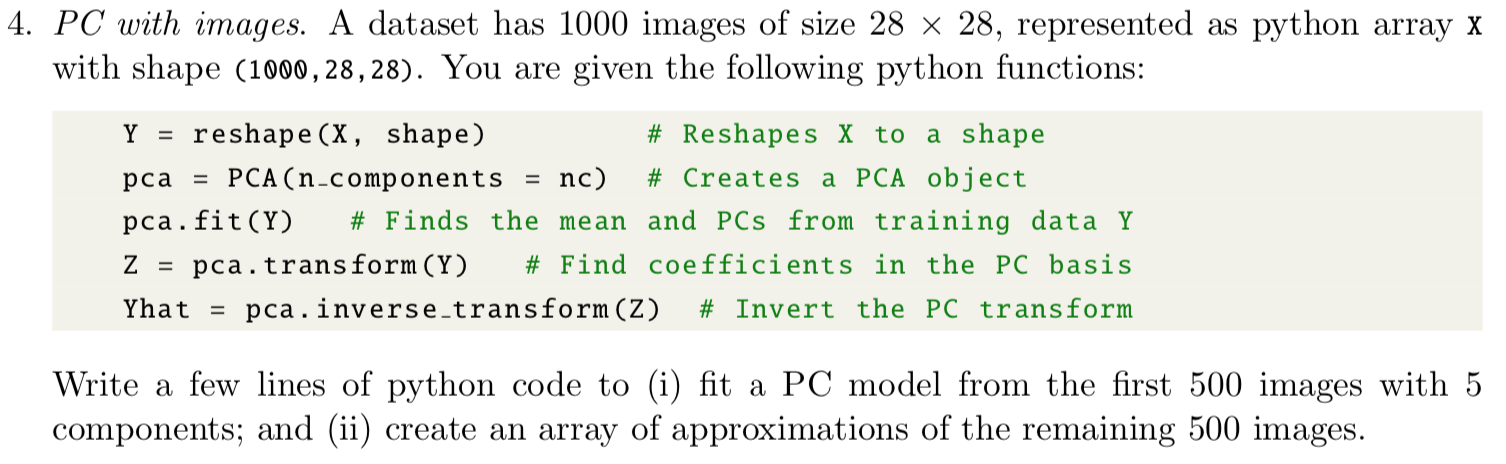

In [ ]:
Y = reshape(X, (1000, 28*28))
pca = PCA(n_components = 5)
pca.fit(Y[:500])
Z = pca.transform(Y[500:,:,:]) # Find coefficients in the PC basis
Yhat = pca.inverse_transform(Z) # Invert the PC transform

The souce code of this Jupyter Notebook will be uploaded to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_6143_Machine_Learning).